<a href="https://colab.research.google.com/github/amrios80/eda-jobs/blob/master/caoba/caoba_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecto CAOBA (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Datasets:** : (1) Demograficos, (2) Notas


**Business Context:** Se requiere conocer que variables mas inciden sobre la desercion academica.

**Restricciones:**
-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Reporte de calidad y preparacion de los datos**

Prep

1. x
2. x




**1.1 Cargue de los datasets:** Se comprimen los dos mas grandes y se suben todos a un repositorio publico en github. Los archivos son .json, por lo cual se usa la funcion de pandas para la lectura de json.

In [2]:
demograficos_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/caoba/Demograficos.csv.gz"
historicos_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/caoba/HistoricoNotas.csv.gz"

# Loading the datasets
demograficos_df = pd.read_csv(demograficos_url, sep=";", compression='gzip')
historicos_df=pd.read_csv(historicos_url, sep=";", compression="gzip")

<ipython-input-2-2e51225077d4>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  historicos_df=pd.read_csv(historicos_url, sep=";", compression="gzip")


 **1.2 Revision de dimensiones de los datasets.** Se observa: 55419 filas en demograficos

In [3]:
print("dimensiones demo:",demograficos_df.shape)
print("dimensiones hist:", historicos_df.shape)
#print("columnas demo:",demograficos_df.columns)
#print("columnas hist:", historicos_df.columns)

dimensiones demo: (55419, 33)
dimensiones hist: (418031, 12)


In [4]:
demograficos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55419 entries, 0 to 55418
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PERIODO_ACAENICO          55419 non-null  object 
 1   CODIGO                    55419 non-null  object 
 2   UNIDAD                    55419 non-null  object 
 3   CODIGOPROGRAMA            55419 non-null  int64  
 4   PROGRAMA                  55419 non-null  object 
 5   SEMESTRE                  55419 non-null  int64  
 6   PROMEDIOSEMESTRE          55419 non-null  object 
 7   GENERO                    55419 non-null  object 
 8   FECHANACIMIENTO           55417 non-null  object 
 9   ESTRATO                   55401 non-null  float64
 10  CIUDADRESIDENCIA          54490 non-null  object 
 11  DEPARTAMENTORESICEDENCIA  54490 non-null  object 
 12  ESTADOCIVIL               55315 non-null  object 
 13  PROMEDIOGENERAL           55419 non-null  object 
 14  SITUAC

In [28]:
def encoder(df):
  label_encoder = LabelEncoder()
  for col in df.select_dtypes(include=['object']).columns:
      df["CAT_"+col] = label_encoder.fit_transform(df[col].astype(str))
  return df
#df = encoder(demograficos_df)

def calculate_target(row):
    if (row['SITUACION_ACTUAL'] == 'EXCLUIDO NO RENOVACION DE MATRICULA' or row["SITUACION_ACTUAL"]=='RETIRO DEFINITIVO' or row["SITUACION_ACTUAL"]=='EXCLUIDO CANCELACION SEMESTRE' ) and  (row['CATEGORIA_ACTUAL'] != "CONTINUIDAD ACADEMICA - EGRESADO") :
        return 0
    else:
        return 1

#lambda x: 1 if x == 'ACTIVO' else 0
demograficos_df["target"]=demograficos_df.apply(calculate_target, axis=1)
#df=demograficos_df
df=demograficos_df[ ~ (demograficos_df["NIVEL_FORMACION"]=="Especialización") ]

def convert_to_numeric( text ):
  text_var = text.replace("," , "." )
  #text_var = float(text_var)
  return text_var


# Group by 'code' and get the index of the maximum semester for each code
idx = df.groupby('CODIGO')['SEMESTRE'].idxmax()

# Use .loc to get the rows with the maximum semester per code
max_semester_rows = demograficos_df.loc[idx]

df=max_semester_rows
df["YEARNACIMIENTO"]=pd.to_datetime(df["FECHANACIMIENTO"])
df['YEARNACIMIENTO'] = df['YEARNACIMIENTO'].dt.year
field="PROMEDIOGENERAL"
df[field] = pd.to_numeric(df[field].str.replace(',', '.'), errors='coerce')
field="PROMEDIOSEMESTRE"
df[field] = pd.to_numeric(df[field].str.replace(',', '.'), errors='coerce')


selected_cols=['PERIODO_ACAENICO', 'CODIGO', 'UNIDAD', 'CODIGOPROGRAMA','PROGRAMA',
       'SEMESTRE', 'PROMEDIOSEMESTRE', 'GENERO', 'FECHANACIMIENTO', 'ESTRATO',
       'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA', 'ESTADOCIVIL',
       'PROMEDIOGENERAL', 'SITUACION_ACTUAL', 'CATEGORIA_ACTUAL',
       'SITUACION_DEL_PERIODO', 'CATEGORIA_DEL_PERIODO', 'DISCAPACIDAD',
       'TIPO_DISCAPACIDAD', 'FECHA_MATRICULA', 'IDCIUDADNACIMIENTO',
       'IDDEPARTAMENTONACIMIENTO',
       'SISBEN', 'NIVELSISBEN', 'CANTIDAD',
       'PERIODO', 'EDAD2', 'EDAD', 'FACULTAD', 'NIVEL_FORMACION','YEARNACIMIENTO','target'
       ]

df=df[selected_cols]
df.to_csv("ultimo_semestre.csv",sep=";",index=False)
df.shape


<ipython-input-28-1a04429d9ef3>:32: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["YEARNACIMIENTO"]=pd.to_datetime(df["FECHANACIMIENTO"])


(10021, 33)

In [29]:
df["target"].value_counts()


,count
target,
1,8770
0,1251


In [30]:
df.sample(3)

,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,YEARNACIMIENTO,target
52691,2024 - 1,53212202146,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,6,4.10,Masculino,17-11-2002,3.00,CALI,VALLE DEL CAUCA,Soltero,3.80,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,08/01/24,76001.00,76.00,0.00,NaN,1,2024-I,22,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,2002,1
7374,2018 - 1T,7305172T316,ESCUELA NACIONAL DEL DEPORTE,7305,TECNOLOGIA EN DEPORTE,2,3.00,Masculino,06-06-1998,1.00,GUACHENE,CAUCA,Soltero,3.40,EXCLUIDO NO RENOVACION DE MATRICULA,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,15/01/18,19300.00,19.00,1.00,1.00,1,2018-I,20,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,1998,0
51677,2024 - 1,53212222126,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,3.50,Masculino,17-11-2003,3.00,BUGA,VALLE DEL CAUCA,Soltero,3.70,ACTIVO,ANTIGUO,ACTIVO,REINGRESO,NINGUNA,NINGUNA,05/01/24,76111.00,76.00,0.00,NaN,1,2024-I,21,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,2003,1


In [27]:
df["PROMEDIOGENERAL"].describe()

,PROMEDIOGENERAL
count,10021.00
mean,3.74
std,0.60
min,0.00
25%,3.60
50%,3.80
75%,4.10
max,5.00


Determinacion de importancia usando clasificador RandomForest

Feature ranking:
1. YEARNACIMIENTO (0.1451)
2. PROMEDIOSEMESTRE (0.1376)
3. EDAD2 (0.1346)
4. FECHANACIMIENTO (0.1142)
5. PROMEDIOGENERAL (0.0887)
6. IDCIUDADNACIMIENTO (0.0466)
7. ESTRATO (0.0428)
8. SITUACION_DEL_PERIODO (0.0368)
9. CIUDADRESIDENCIA (0.0357)
10. CATEGORIA_DEL_PERIODO (0.0254)
11. CODIGOPROGRAMA (0.0249)
12. PROGRAMA (0.0242)
13. IDDEPARTAMENTONACIMIENTO (0.0217)
14. EDAD (0.0184)
15. GENERO (0.0165)
16. FACULTAD (0.0146)
17. NIVELSISBEN (0.0139)
18. SISBEN (0.0132)
19. DEPARTAMENTORESICEDENCIA (0.0102)
20. DISCAPACIDAD (0.0100)
21. TIPO_DISCAPACIDAD (0.0089)
22. ESTADOCIVIL (0.0079)
23. NIVEL_FORMACION (0.0061)
24. UNIDAD (0.0018)
25. CANTIDAD (0.0000)


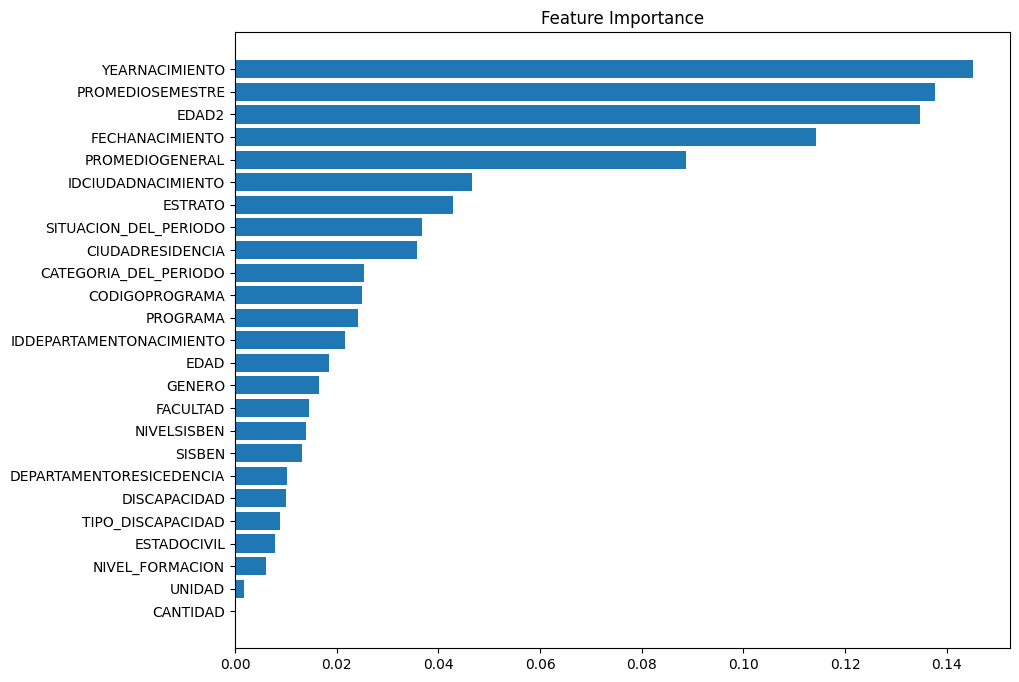

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def correlation_matrix(df):
    # Assuming df is your DataFrame and 'target' is your target column
    correlation_matrix = df.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

    # Get the correlation values of all features with respect to the target
    correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
    print(correlation_with_target)

def tree_importance(df, target_var="target"):
  # Load data (assuming your DataFrame is named df)
  # Replace non-numeric columns with numeric ones
  df = df.copy()

  # Encode categorical columns
  label_encoder = LabelEncoder()
  for col in df.select_dtypes(include=['object']).columns:
      df[col] = label_encoder.fit_transform(df[col].astype(str))

  # Define features and target
  X = df.drop(columns='target')
  y = df['target']

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Train a Random Forest model
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X_train, y_train)

  # Get feature importance
  importances = rf.feature_importances_
  indices = np.argsort(importances)[::-1]

  # Print feature importance rankings
  print("Feature ranking:")
  for f in range(X_train.shape[1]):
      print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

  # Plot feature importance
  plt.figure(figsize=(10, 8))
  plt.title("Feature Importance")
  plt.barh(range(X_train.shape[1]), importances[indices], align="center")
  plt.yticks(range(X_train.shape[1]), X.columns[indices])
  plt.gca().invert_yaxis()
  plt.show()
  return df

exclude=["SITUACION_ACTUAL", "PERIODO_ACAENICO","PERIODO","CATEGORIA_ACTUAL","FECHA_MATRICULA","CODIGO","SEMESTRE" ]

df_copy=df.copy()
for i in exclude:
  df_copy.drop(columns=[i], inplace=True)

df_copy=tree_importance(df_copy)

Correlacion contra la variable target

In [32]:
def show_corr_target(df):
  # Step 1: Compute the correlation matrix
  corr_matrix = df.corr()

  # Step 2: Flatten the correlation matrix and keep track of the column pairs
  corr_pairs = (
      corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Only upper triangle (avoid duplicates)
      .stack()  # Convert to long-form
      .reset_index()  # Convert index to columns
  )

  corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

  # Step 3: Sort by absolute correlation value
  corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
  sorted_corr = corr_pairs[  (corr_pairs['Column 1']=='target')|(corr_pairs['Column 2']=='target')   ].sort_values(by='Abs Correlation', ascending=False)[:30]

  # Step 4: Display the top results
  print(sorted_corr)

show_corr_target(df_copy)

                     Column 1 Column 2  Correlation  Abs Correlation
89           PROMEDIOSEMESTRE   target         0.14             0.14
208           PROMEDIOGENERAL   target         0.11             0.11
233     CATEGORIA_DEL_PERIODO   target        -0.09             0.09
298           NIVEL_FORMACION   target         0.09             0.09
109                    GENERO   target        -0.08             0.08
299            YEARNACIMIENTO   target         0.06             0.06
296                  FACULTAD   target         0.06             0.06
284               NIVELSISBEN   target         0.05             0.05
289                     EDAD2   target         0.05             0.05
146                   ESTRATO   target        -0.04             0.04
46             CODIGOPROGRAMA   target         0.03             0.03
163          CIUDADRESIDENCIA   target         0.03             0.03
23                     UNIDAD   target         0.02             0.02
254         TIPO_DISCAPACIDAD   ta

Correlacion entre variables

In [10]:
def show_corr(df):
  # Step 1: Compute the correlation matrix
  corr_matrix = df.corr()

  # Step 2: Flatten the correlation matrix and keep track of the column pairs
  corr_pairs = (
      corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Only upper triangle (avoid duplicates)
      .stack()  # Convert to long-form
      .reset_index()  # Convert index to columns
  )

  corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

  # Step 3: Sort by absolute correlation value
  corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
  sorted_corr = corr_pairs.sort_values(by='Abs Correlation', ascending=False)[:30]

  # Step 4: Display the top results
  print(sorted_corr)

show_corr(df_copy)

                     Column 1                  Column 2  Correlation  \
255        IDCIUDADNACIMIENTO  IDDEPARTAMENTONACIMIENTO     0.990429   
288                     EDAD2            YEARNACIMIENTO    -0.909532   
285                     EDAD2                      EDAD     0.871439   
292                      EDAD            YEARNACIMIENTO    -0.789637   
75           PROMEDIOSEMESTRE           PROMEDIOGENERAL     0.776700   
76           PROMEDIOSEMESTRE     SITUACION_DEL_PERIODO    -0.743418   
195           PROMEDIOGENERAL     SITUACION_DEL_PERIODO    -0.624812   
89           PROMEDIOSEMESTRE                    target     0.598258   
171  DEPARTAMENTORESICEDENCIA  IDDEPARTAMENTONACIMIENTO     0.574378   
170  DEPARTAMENTORESICEDENCIA        IDCIUDADNACIMIENTO     0.571509   
208           PROMEDIOGENERAL                    target     0.560811   
221     SITUACION_DEL_PERIODO                    target    -0.544476   
66                   PROGRAMA           NIVEL_FORMACION    -0.53

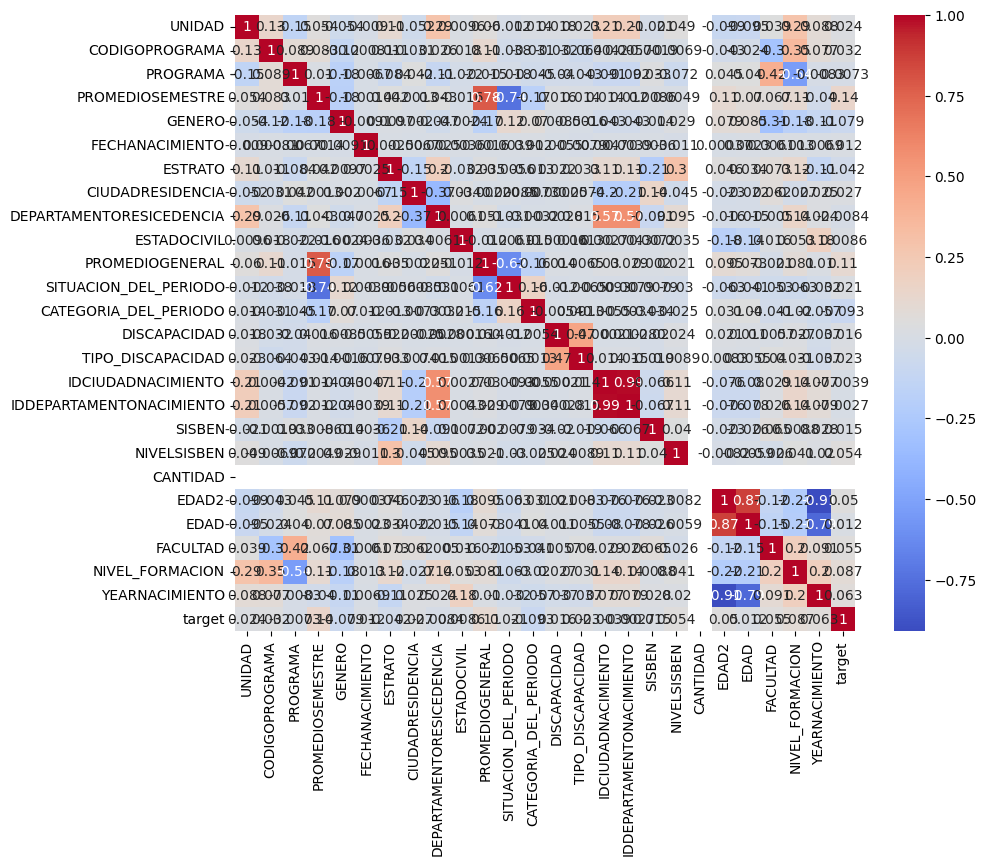

target                      1.00
PROMEDIOSEMESTRE            0.14
PROMEDIOGENERAL             0.11
NIVEL_FORMACION             0.09
YEARNACIMIENTO              0.06
FACULTAD                    0.06
NIVELSISBEN                 0.05
EDAD2                       0.05
CODIGOPROGRAMA              0.03
CIUDADRESIDENCIA            0.03
UNIDAD                      0.02
TIPO_DISCAPACIDAD           0.02
SITUACION_DEL_PERIODO       0.02
DISCAPACIDAD                0.02
SISBEN                      0.01
EDAD                        0.01
FECHANACIMIENTO             0.01
ESTADOCIVIL                 0.01
IDDEPARTAMENTONACIMIENTO   -0.00
IDCIUDADNACIMIENTO         -0.00
PROGRAMA                   -0.01
DEPARTAMENTORESICEDENCIA   -0.01
ESTRATO                    -0.04
GENERO                     -0.08
CATEGORIA_DEL_PERIODO      -0.09
CANTIDAD                     NaN
Name: target, dtype: float64


In [33]:
correlation_matrix(df_copy)

 **1.3 Exploracion y Entendimiento de cada dataset**

**1.3.1 Exploracion dataset Demograficos:** Las siguientes variables se identifican como importantes para el analisis:

important=["FECHA_MATRICULA","FECHANACIMIENTO","EDAD2","CIUDADNACIMIENTO","CIUDADRESIDENCIA","ESTRATO","CODIGOPROGRAMA","PROGRAMA","GENERO","NIVELSISBEN","DISCAPACIDAD","DEPARTAMENTORESICEDENCIA","EDAD","FACULTAD","SISBEN","TIPO_DISCAPACIDAD","ESTADOCIVIL","NIVEL_FORMACION","UNIDAD","CANTIDAD"]

*   FECHA_MATRICULA
*   FECHANACIMIENTO
*   EDAD2
*   CIUDADNACIMIENTO
*   CIUDADRESIDENCIA
*   ESTRATO
*   CODIGOPROGRAMA
*   GENERO
*   NIVELSISBEN
*   DISCAPACIDAD



In [34]:

def histogram(df , field="price"):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[field], bins=10, kde=True)
  plt.title(f'{field} Distribution')
  plt.xlabel(field)
  plt.ylabel('Frequency')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()


pd.set_option('display.float_format', '{:.2f}'.format)
def statistics(df , field="price"):
  print(f"Statistics for {field}:")
  print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - 1.5 * iqr
     upper_bound = q3 + 1.5 * iqr
     outliers = df[(df[field] < lower_bound) | (df[field] > upper_bound)]
     print(f"\nOutliers in {field}:", outliers.shape[0])


def print_top(df,field="brand"):
   top_10_brands = total[field].value_counts().head(10).index.tolist()
   print(top_10_brands)

def histogram_object(df , field="brand"):
  qty=len(df[field].value_counts())
  data={}
  if qty > 10:
    data=df[field].value_counts()[:11]
  else:
    data=df[field].value_counts()
  fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
  data.plot(kind="bar", ax=ax1, color="green")
  ax1.set_title(field)
  plt.show()

def print_pie(df, field="brand", title=""):
  threshold=16
  value_counts = df[field].value_counts()
  qty=len(value_counts)
  if qty > threshold:
    other_cats_sum=value_counts[threshold:].sum()
    value_counts = value_counts[:threshold]
    value_counts['Otros'] = other_cats_sum
  else:
    value_counts = value_counts
  plt.figure(figsize=(6, 6))
  value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
  plt.ylabel('')  # Remove the y-axis label
  plt.title(f'Distribution of Values in {field} {title} ')
  plt.show()


def line_graph(df, field="brand", x_var="price"):
  density_var=field

  top_brands = df[field].value_counts().head(10).index.tolist()
  marcas_frec_cumsum=df[field].value_counts(normalize=True).cumsum()

  q1 = df[x_var].quantile(0.25)
  q2 = df[x_var].quantile(0.50)
  q3 = df[x_var].quantile(0.75)
  iqr = q3 - q1

  fig, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.kdeplot(
      data=df.loc[df[x_var] <= (q3 + 1.5 * iqr)].loc[df[field].isin( top_brands )],
      x=x_var,
      hue=field,
      bw_adjust=.3,
      ax=ax
  )
  for (brand, color) in zip( marcas_frec_cumsum , ["steelblue", "orange", "green"]):
      ax.axvline(df.loc[df[ x_var ] <= (q3 + 1.5 * iqr)].loc[df[ density_var] == brand, density_var].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
  plt.title(f"{x_var} distribution by {density_var} (with means)")
  if "YEAR" in x_var :
    #plt.xscale("log")
    plt.xlim(1950, 2025)  # Set x-axis limits

  plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


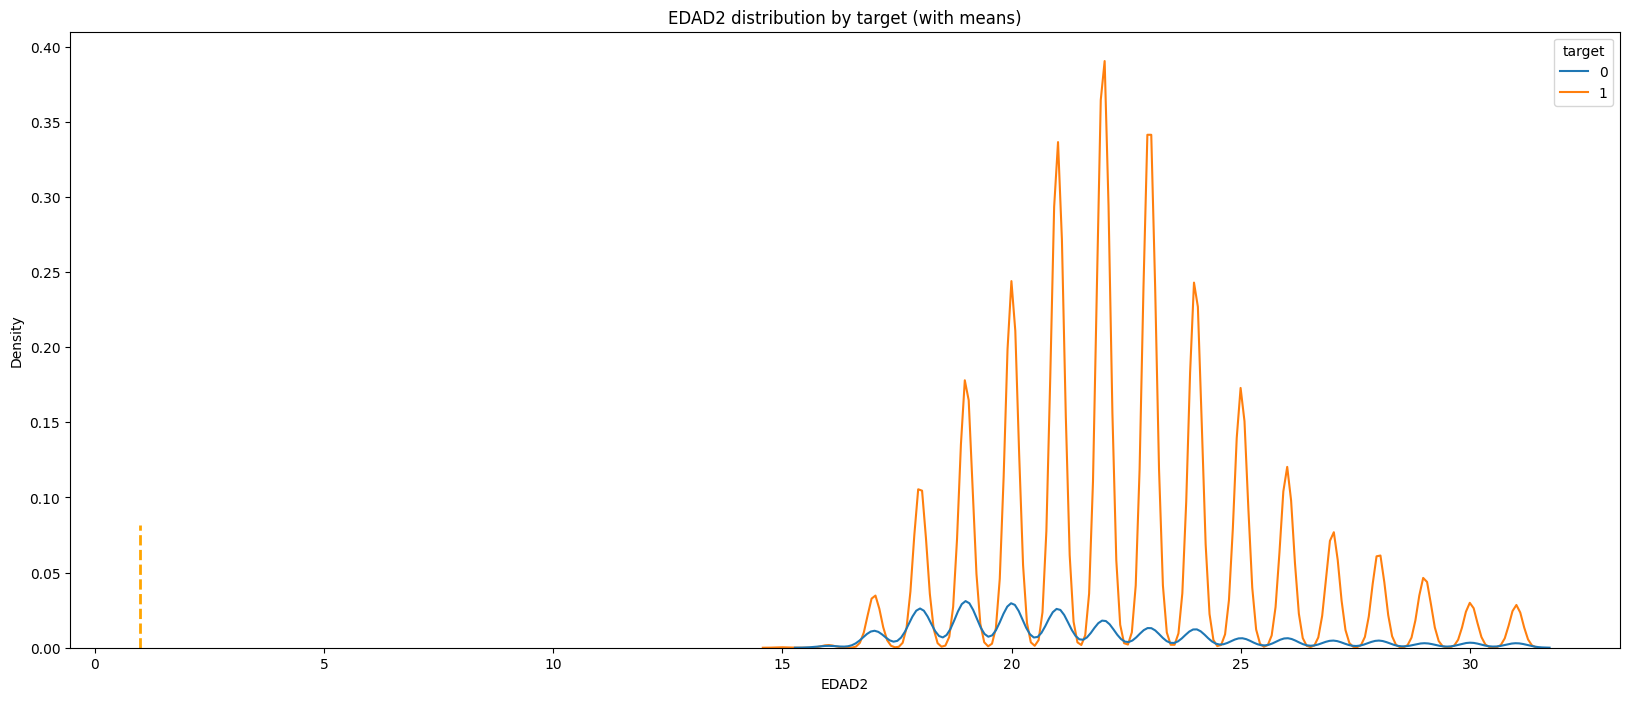

In [35]:
line_graph(df=df_copy, field="target", x_var="EDAD2")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


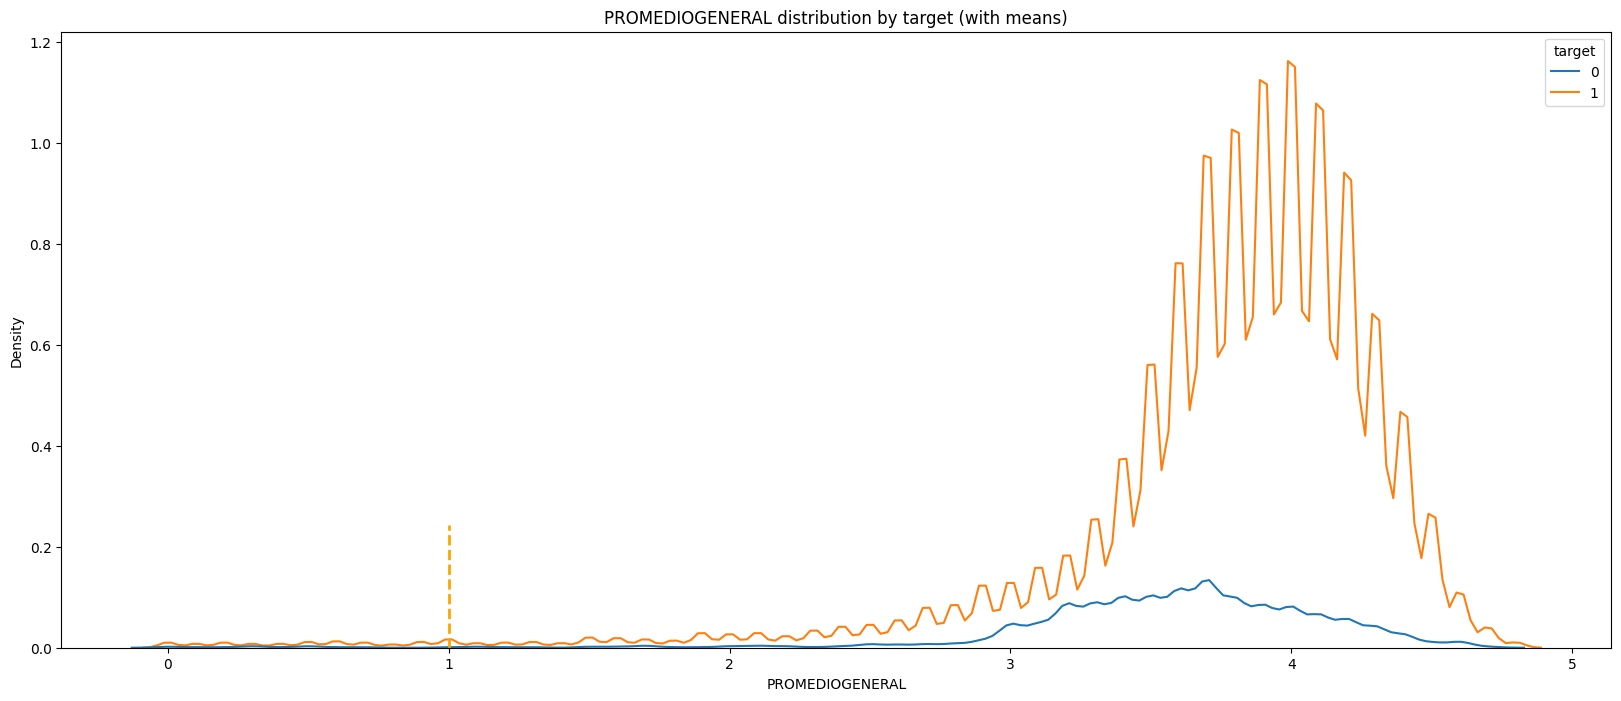

In [36]:
line_graph(df=df_copy, field="target", x_var="PROMEDIOGENERAL")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


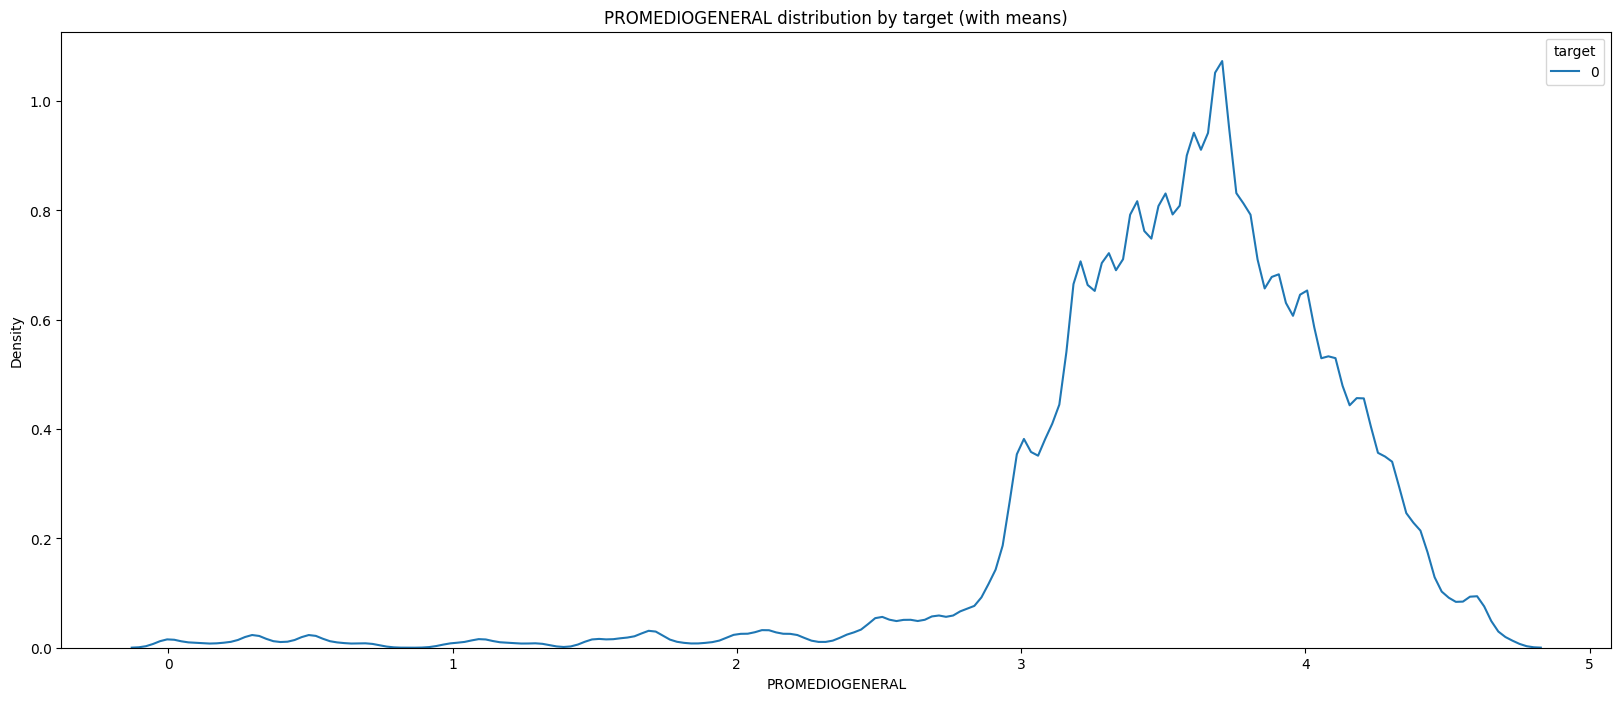

In [49]:
retirados=df[df["target"]==0]
line_graph(df=retirados, field="target", x_var="PROMEDIOGENERAL")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


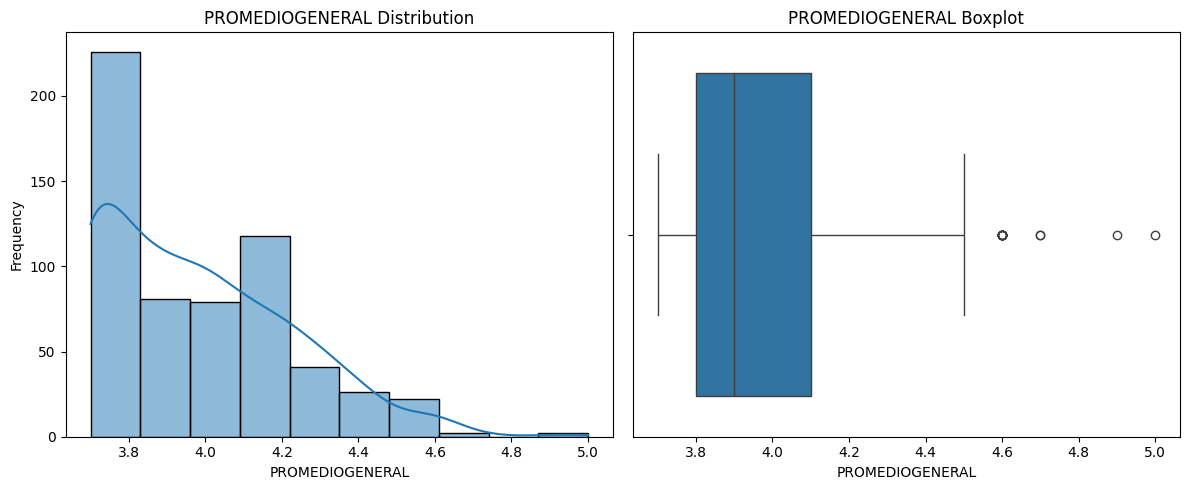

In [50]:
df_altos=retirados[retirados["PROMEDIOGENERAL"]>3.6]
histogram(df_altos, "PROMEDIOGENERAL")

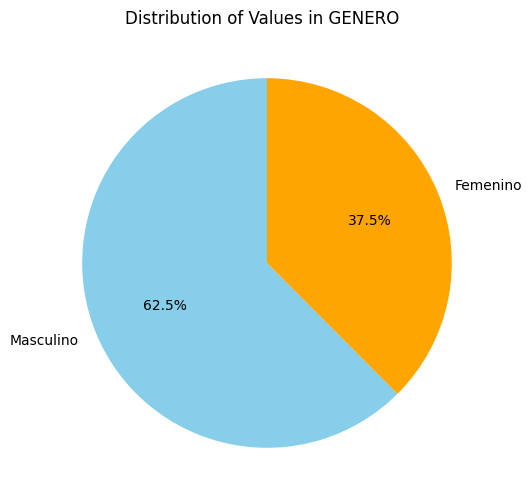

In [51]:
print_pie(df_altos, "GENERO")
#de los altos se van mas los genero 1.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


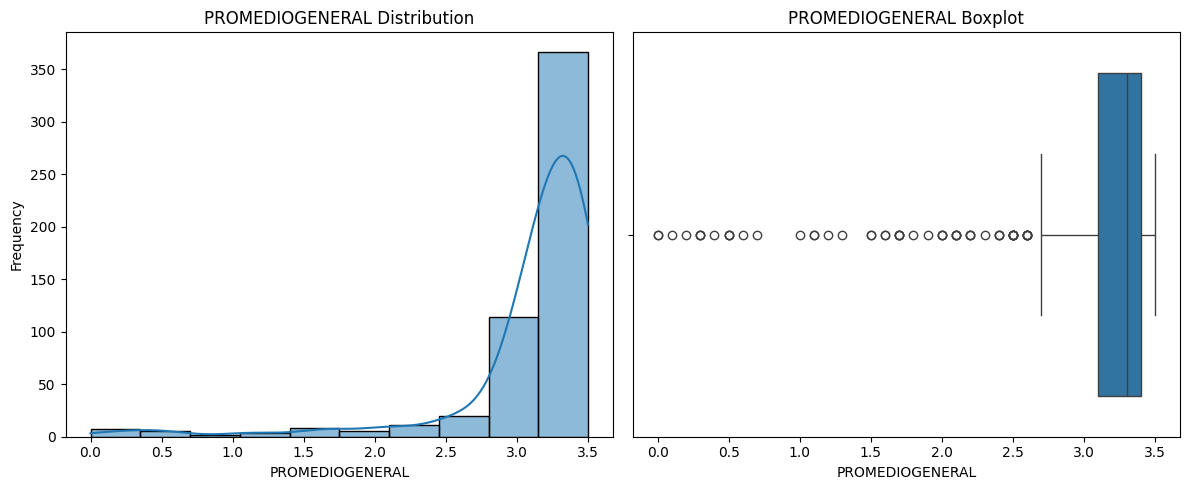

(543, 33)

In [52]:
df_bajos=retirados[retirados["PROMEDIOGENERAL"]<3.6]
histogram(df_bajos, "PROMEDIOGENERAL")
df_bajos.shape

In [45]:
df_bajos.columns

Index(['UNIDAD', 'CODIGOPROGRAMA', 'PROGRAMA', 'PROMEDIOSEMESTRE', 'GENERO',
       'FECHANACIMIENTO', 'ESTRATO', 'CIUDADRESIDENCIA',
       'DEPARTAMENTORESICEDENCIA', 'ESTADOCIVIL', 'PROMEDIOGENERAL',
       'SITUACION_DEL_PERIODO', 'CATEGORIA_DEL_PERIODO', 'DISCAPACIDAD',
       'TIPO_DISCAPACIDAD', 'IDCIUDADNACIMIENTO', 'IDDEPARTAMENTONACIMIENTO',
       'SISBEN', 'NIVELSISBEN', 'CANTIDAD', 'EDAD2', 'EDAD', 'FACULTAD',
       'NIVEL_FORMACION', 'YEARNACIMIENTO', 'target'],
      dtype='object')

In [46]:
# Data Analysis
# Se va a analizar:

# Variable dependiente (y)
# tipos de variables (categorical y numerical)
# data faltante
# Variables numericas:
#   Discretas
#   Continuas
#   Distribuciones
#   Transformaciones
# Variables categoricas
#   Cardinalidad
#   Labels "raros"
#   Mappings especiales

# to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for the yeo-johnson transformation
import scipy.stats as stats


def dibuja_histograma( data, target_var , label):
  data[target_var].hist(bins=10, density=True)
  plt.ylabel(label)
  plt.xlabel(target_var)
  plt.show()

def remap_string_to_numbers(data, qual_vars):
  # re-map strings to numbers, which determine quality
  qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}
  for var in qual_vars:
    data[var] = data[var].map(qual_mappings)
  return data

def clasifica_variables( data, target_var):
  cat_vars = [var for var in data.columns if data[var].dtype == 'O']
  num_vars = [var for var in data.columns if var not in cat_vars and var != target_var]
  return cat_vars, num_vars

def print_dtypes(data):
  print(data.dtypes)

def valores_faltantes( data):
  # make a list of the variables that contain missing values
  vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
  # determine percentage of missing values (expressed as decimals)
  # and display the result ordered by % of missin data
  #data[vars_with_na].isnull().mean().sort_values(ascending=False)
  data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
  plt.ylabel('Percentage of missing data')
  plt.axhline(y=0.90, color='r', linestyle='-')
  plt.axhline(y=0.80, color='g', linestyle='-')
  plt.show()
  return vars_with_na

def analizar_valores_na(df, var, target_var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)[target_var].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target_var, color='green')

    plt.show()

def analizar_na(data, vars_with_na, target_var):
    for var in vars_with_na:
        analizar_valores_na(data, var, target_var)

def plot_continous_vars(data, cont_vars ):
    data[cont_vars].hist(bins=30, figsize=(15,15))
    plt.show()


def get_discrete_vars(data, year_vars, num_vars):
    #  let's male a list of discrete variables
    discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]
    print('Variables discretas: ', len(discrete_vars))
    return discrete_vars

def cardinality(data, cat_vars):
    data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

def plot_discrete_vars(data, discrete_vars, target_var):
    for var in discrete_vars:
        # make boxplot with Catplot
        sns.catplot(x=var, y=target_var, data=data, kind="box", height=4, aspect=1.5)
        # add data points to boxplot with stripplot
        sns.stripplot(x=var, y=target_var, data=data, jitter=0.1, alpha=0.3, color='k')
        plt.show()


def get_continous_vars(data, year_vars, num_vars, discrete_vars):
    # make list of continuous variables
    cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]
    print('Variables continuas: ', len(cont_vars))
    return cont_vars

def get_other_cats(data, cat_vars, qual_vars ):
    cat_others = [var for var in cat_vars if var not in qual_vars]
    print("Other cats: %d" % len(cat_others))
    return cat_others

def analyze_rare_labels(df, var, rare_perc, target_var):
    df = df.copy()
    # determine the % of observations per category
    if var in df.columns:
      tmp = df.groupby(var)[target_var].count() / len(df)
      # return categories that are rare
      return tmp[tmp < rare_perc]

def analyze_all_rare_labels(data, cat_others, target_var ):
    print(cat_others)
    for var in cat_others:
      print(analyze_rare_labels(data, var, 0.01, target_var))
      print()

def plot_cats(data, cat_others, target_var):
    for var in cat_others:
      # make boxplot with Catplot
      sns.catplot(x=var, y=target_var, data=data, kind="box", height=4, aspect=1.5)
      # add data points to boxplot with stripplot
      sns.stripplot(x=var, y=target_var, data=data, jitter=0.1, alpha=0.3, color='k')
      plt.show()

def quantities(df, var, target_var):
    x=df.groupby(var)[target_var].count()
    print(x)

def get_target_var(data):
    return "total_cases"



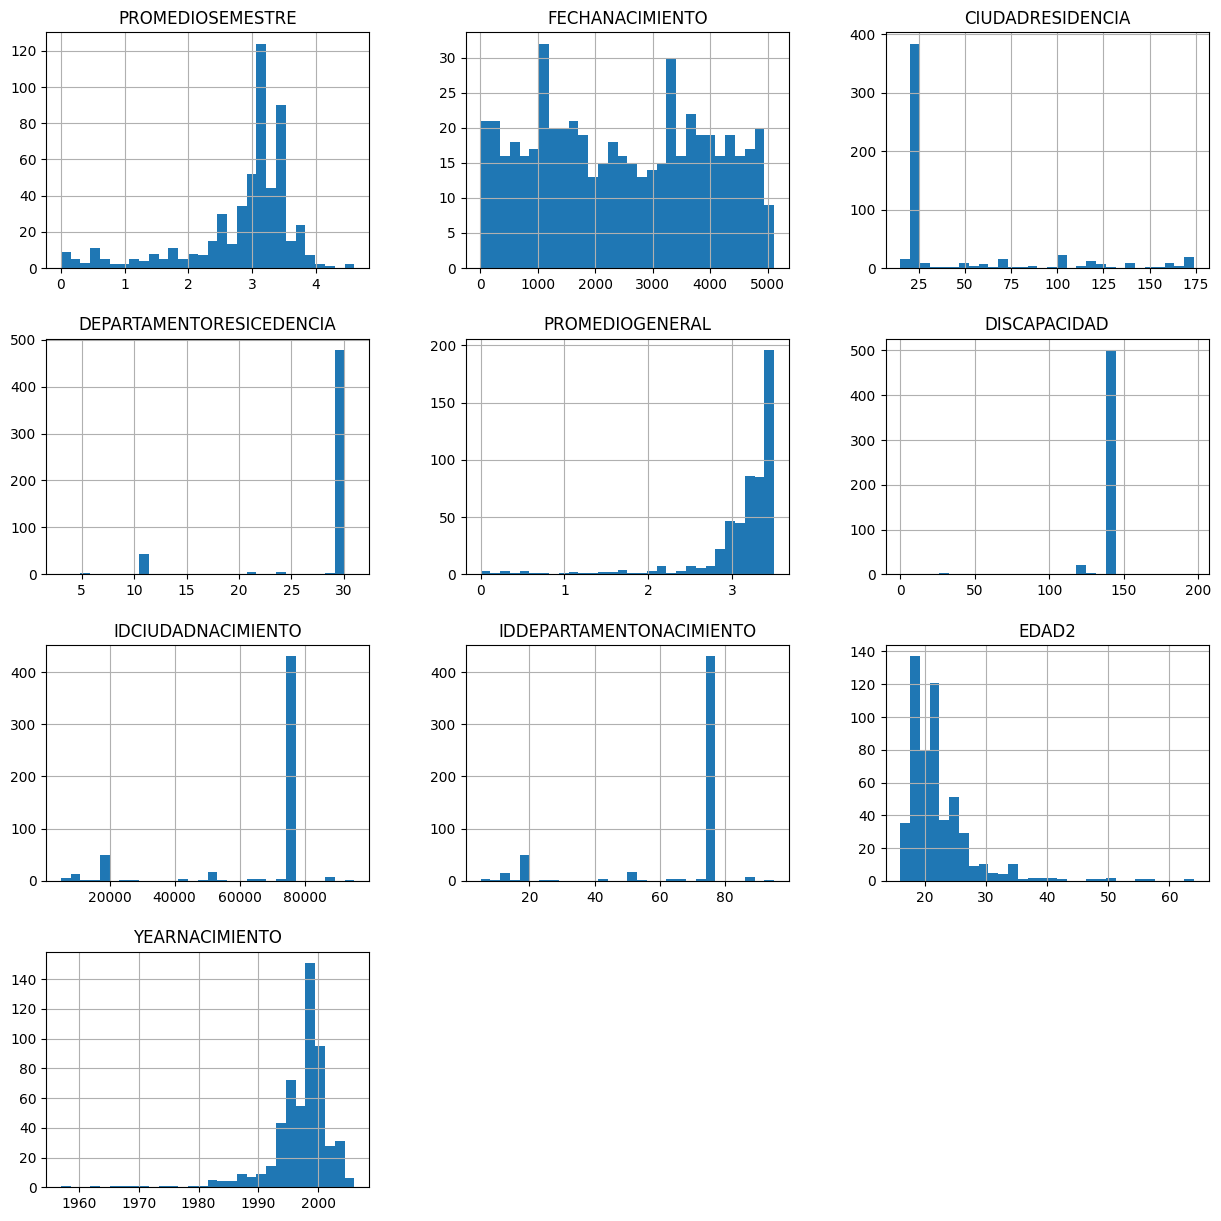

In [47]:
disc_vars= ['UNIDAD', 'CODIGOPROGRAMA', 'PROGRAMA', 'GENERO', 'ESTRATO', 'ESTADOCIVIL', 'SITUACION_DEL_PERIODO', 'CATEGORIA_DEL_PERIODO', 'TIPO_DISCAPACIDAD', 'SISBEN', 'NIVELSISBEN', 'CANTIDAD', 'EDAD', 'FACULTAD', 'NIVEL_FORMACION', 'target']
cont_vars=['PROMEDIOSEMESTRE', 'FECHANACIMIENTO', 'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA', 'PROMEDIOGENERAL', 'DISCAPACIDAD', 'IDCIUDADNACIMIENTO', 'IDDEPARTAMENTONACIMIENTO', 'EDAD2', 'YEARNACIMIENTO']
plot_continous_vars(df_bajos, cont_vars)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


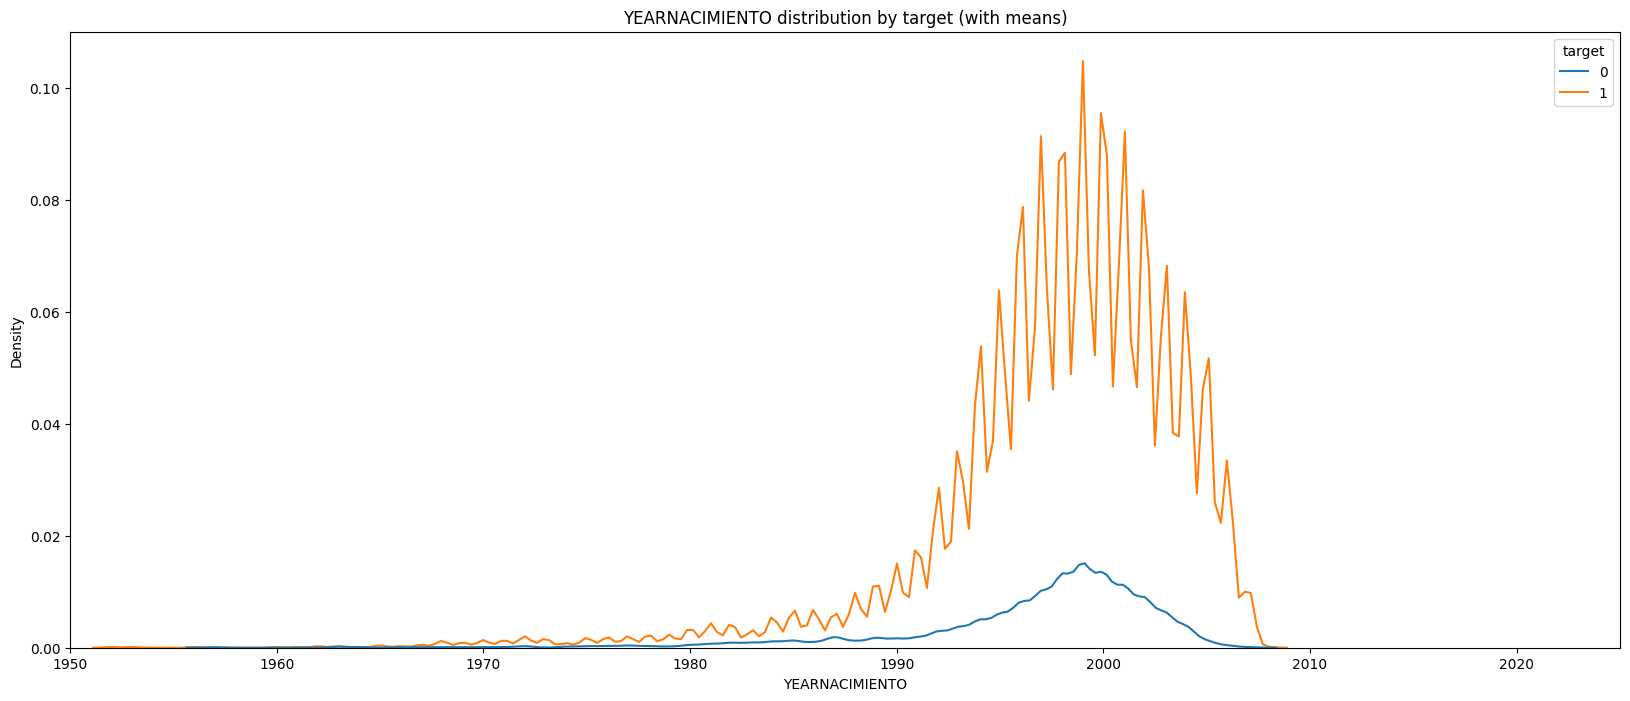

In [48]:
line_graph(df=df_copy[ (df_copy["YEARNACIMIENTO"]>1900) & (df_copy["YEARNACIMIENTO"]<2100) ], field="target", x_var="YEARNACIMIENTO")

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

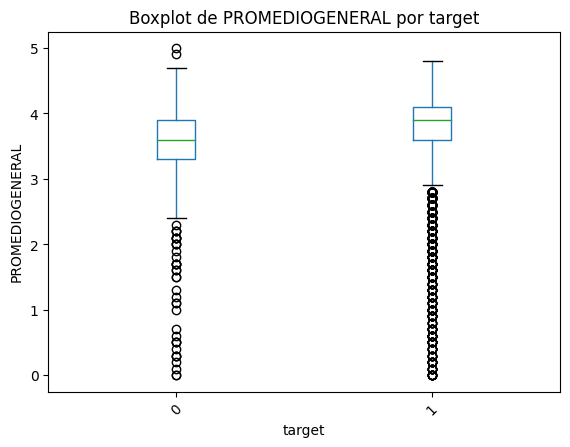

In [53]:
def comparative_boxplot(df, field, target_var="target"):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  df[df[field].isin( top )].boxplot(column= target_var , by=field, grid=False)
  plt.title(f'Boxplot de {target_var} por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel(  target_var )

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(df_copy, "target","PROMEDIOGENERAL")

In [59]:
#df[df["target"]==0].boxplot(column="PROMEDIOGENERAL" , by="target", grid=False)
df[df["target"]==0]["PROMEDIOGENERAL"].describe()


,PROMEDIOGENERAL
count,1251.00
mean,3.57
std,0.60
min,0.00
25%,3.30
50%,3.60
75%,3.90
max,5.00


In [60]:
df[df["target"]==1]["PROMEDIOGENERAL"].describe()

,PROMEDIOGENERAL
count,8770.00
mean,3.77
std,0.60
min,0.00
25%,3.60
50%,3.90
75%,4.10
max,4.80


Prueba estadistica

In [62]:
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

def statistic_test( df, field="cluster", selected_groups=[], col="price"):
  print(df[field].value_counts())

  #Step0: Choose the appropriate test: t-test vs. Mann-Whitney.

  #step1: define null and alernative hypothesis
  #     Ho:  u1=u2
  #     H1:  u1!=u2


  #Step2: Define the significance level
  alpha = 0.01

  #Step3-4: calculate the statistic and p-value
  # Assuming normality
  t_stat, p_value = ttest_ind(
      df.loc[df[field] == selected_groups[0], col ],
      df.loc[df[field] == selected_groups[1], col ],
      equal_var=False
  )
  print("T-statistic:", t_stat)
  print("P-value:", p_value)

  # Testing normality for each group
  print(f"{selected_groups[0]}:", shapiro( df.loc[ df[field] == selected_groups[0], col])[1])
  print(f"{selected_groups[1]}:", shapiro( df.loc[ df[field] == selected_groups[1], col])[1])

  # Applying a non-parametric test
  t_stat, p_value = mannwhitneyu(
      df.loc[ df[field] == selected_groups[0], col],
      df.loc[ df[field] == selected_groups[1], col]
  )

  print("T-statistic:", t_stat)
  print("P-value:", p_value)

  #Step5: Make the decision

  if p_value <= alpha:
      print(f"REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is statistically significant.")
  else:
      print(f"FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is not statistically significant.")



selected_groups=[0,1]
statistic_test(df=df, field="target", selected_groups=selected_groups, col="PROMEDIOGENERAL" )



target
1    8770
0    1251
Name: count, dtype: int64
T-statistic: -11.101209029967658
P-value: 1.1720477873469843e-27
0: 1.340675418118501e-33
1: 4.359644768489606e-74
T-statistic: 3916262.0
P-value: 9.786279388350339e-61
REJECT THE NULL HYPOTHESIS: The difference in listing price between 0 and 1 groups is statistically significant.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8770.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
df_copy[ (df_copy["YEARNACIMIENTO"]>1900) & (df_copy["YEARNACIMIENTO"]<2100) ]['target'].plot()
def plot_years(df, year_col="YEARNACIMIENTO", target_col='target'):

  # Step 1: Count the occurrences of target values (0 and 1) for each year
  counts = df.groupby([year_col, target_col]).size().unstack(fill_value=0)

  # Step 2: Plot scatter graph
  plt.scatter(counts.index, counts[0], color='red', label='Target 0')
  plt.scatter(counts.index, counts[1], color='blue', label='Target 1')

  # Add labels and legend
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.xlim(1950, 2025)  # Set x-axis limits
  plt.title('Count of Target Values by Year')
  plt.legend()

  # Show the plot
  plt.show()
plot_years( df_copy )

In [ ]:
print_pie(df_copy, "target")

In [ ]:
print_pie(df_copy[df_copy["target"]==0], "GENERO", "retirados")
print_pie(df_copy, "GENERO", "TOTAL")

In [ ]:
print_pie(df_copy[df_copy["target"]==0], "ESTRATO")
print_pie(df_copy, "ESTRATO", "TOTAL")


In [ ]:
print_pie(df_copy[df_copy["target"]==0], "NIVELSISBEN")
print_pie(df_copy, "NIVELSISBEN","TOTAL")


In [ ]:
print_pie(df_copy, "EDAD2","TOTAL")
print_pie(df_copy[df_copy["target"]==0], "EDAD2")

In [ ]:
print_pie(df_copy[df_copy["target"]==0], "PROGRAMA")


In [ ]:
print_pie(df_copy[df_copy["target"]==0], "FACULTAD")

In [ ]:
print_pie(df[df["target"]==0], "TIPO_DISCAPACIDAD")

In [ ]:
print_pie(df[df["target"]==0], "ESTADOCIVIL")

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

def linear_regression(df):
    # linear regression feature importance

    # define dataset
    #X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
    # Encode categorical columns
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
      df[col] = label_encoder.fit_transform(df[col].astype(str))

    df = df.dropna(axis=1)

    # Define features and target
    X = df.drop(columns='target')
    y = df['target']

    print(X.head(3))
    print(y[:3])
    # define the model
    model = LinearRegression()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.coef_


    # summarize feature importance
    for i,v in enumerate(importance):
     print('Feature:  %0d - %s , Score: %.5f' % (   i, df.columns[i] , v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

linear_regression(demograficos_df)

In [ ]:
from IPython.display import display
def revision(df, target_var="target" ):
  # Variable dependiente (y)

  display(dibuja_histograma(df, target_var, target_var ))

  # tipos de variables (categorical y numerical)
  print("Tipos de variables:")
  print_dtypes(df)
  cat_vars , num_vars = clasifica_variables( df, "total_cases")
  print(" Categoricas: %s " % cat_vars )
  print(" Numericas:   %s " % num_vars )



  # data faltante
  print("Data faltante:")
  vars_with_na = valores_faltantes(df)
  #analizar_na(poller_data, vars_with_na, target_var)

  # Variables numericas:
  print("Variables numericas: ")
  time_vars=[]
  discrete_vars=get_discrete_vars(df, time_vars, num_vars)
  print( "Variables discretas: %s" % discrete_vars)

  #   Continuas
  cont_vars=get_continous_vars(df, time_vars, num_vars, discrete_vars)
  print("Variables continuas: %s" % cont_vars)

  #   Distribuciones
  print("Distribuciones:")
  display(plot_continous_vars(df, cont_vars))



  var="iso_code"
  #quantities(df, "iso_code", target_var)
  #quantities(df, "date", target_var)

  #   Transformaciones

  # Variables categoricas
  print("Variables categoricas")
  #   Cardinalidad
  print("Cardinalidad")
  #cardinality(df, cat_vars)

  #   Labels "raros"
  #   Mappings especiales
  qual_vars=[]
  #remap
  cat_others =get_other_cats(df, cat_vars, qual_vars)
  analyze_all_rare_labels(df, cat_others, target_var )
  display(plot_cats(df, cat_others, target_var))


revision(df_copy)

In [ ]:
#Se identifican los campos nulos y el tipo de datos para el dataset search_results


In [ ]:
# detectando duplicados por id


In [ ]:
# el dataset search_results no tiene duplicados


# **2. Analisis exploratorio de las variables mas relevantes**




### **2.1 Analisis Univariado**







**Atributo 1 Precio (Price) - Analisis medidas de tendencia central y distribucion:** El precio tiene una alta variabilidad se encuentran ofertas de ceulares desde 45.000 COP, sin embargo la mediana del precio es de 713.000 COP. En la grafica de bigotes se evidencia la alta variabilidad del precio.

In [ ]:
#df_copy.info()
df_copy["FECHA_MATRICULA"]=pd.to_datetime(df_copy["FECHA_MATRICULA"])
#df_copy["FECHANACIMIENTO"]=pd.to_datetime(df_copy["FECHANACIMIENTO"])



In [ ]:
df_copy["FECHA_MATRICULA"].value_counts()
def plot_dates(df, date_col):
  # Count the frequency of each date
  date_counts = df[date_col].value_counts().sort_index()

  # Plot the frequency of 'date_of_registry'
  plt.figure(figsize=(10, 6))
  date_counts.plot(kind='bar')

  # Add labels and title
  plt.title('Frequency of date_of_registry')
  plt.xlabel('Date of Registry')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

  # Show the plot
  plt.tight_layout()
  plt.show()


In [ ]:
def compare(df, date_col, groupby_trimester=0, target_var="target"):
  # Group by 'date_of_registry' and 'status', then count occurrences
  grouped = df.groupby([date_col, target_var]).size().unstack(fill_value=0)


  # Group by quarter (trimester) and status, then count occurrences
  df['trimester'] = df[date_col].dt.to_period('Q')  # Extract the quarter

  if groupby_trimester:
    # Group by 'trimester' and 'status', then count occurrences
    grouped = df.groupby(['trimester', target_var]).size().unstack(fill_value=0)
    #grouped.plot(kind='bar', stacked=True, figsize=(10, 6))


  # Plot the result
  grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

  # Add labels and title
  plt.title('Count of Status by Date of Registry')
  plt.xlabel('Date of Registry')
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.legend(title=target_var)


  # Show the plot
  plt.tight_layout()
  plt.show()

compare(df_copy, "FECHA_MATRICULA", 1)

**Atributo 2 Meses de garantia (warranty_months) - Analisis medidas de tendencia central y distribucion:**

Los meses de garantia varian entre 0 y 24 meses, siendo la 12 meses la garantia mas comun entre las ofertas.


In [ ]:
histogram(df_copy, "EDAD2")

In [ ]:
statistics(df_copy, "EDAD2")

In [ ]:
histogram(df_copy, "EDAD")

**Atributo 3 Brand - Analisis medidas de tendencia central y distribucion:** Hay un total de 80 marcas de celulares, siendo Xiaomi la que tiene mayor cantidad de referencias ofertadas (152). El top 10 de las marcas con mayor numero de referencias ofertadas son: Xiaomi, Samsung, Motorola, Apple, Tecno, Generic, ZTE, Infinix, Oppo y Corn. El 53% de las ofertas se concentran en las marcas: Xiaomi, Samsung, Motorola y Apple.

In [ ]:
statistics(total, "brand")

In [ ]:
def print_top(df,field="brand"):
   top_10_brands = total[field].value_counts().head(10).index.tolist()
   print(top_10_brands)

print_top(total)

In [ ]:
def histogram_object(df , field="brand"):
  qty=len(df[field].value_counts())
  data={}
  if qty > 10:
    data=df[field].value_counts()[:11]
  else:
    data=df[field].value_counts()
  fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
  data.plot(kind="bar", ax=ax1, color="green")
  ax1.set_title(field)
  plt.show()

histogram_object(total)

In [ ]:
def print_pie(df, field="brand"):
  threshold=16
  value_counts = df[field].value_counts()
  qty=len(value_counts)
  if qty > threshold:
    other_cats_sum=value_counts[threshold:].sum()
    value_counts = value_counts[:threshold]
    value_counts['Otros'] = other_cats_sum
  else:
    value_counts = value_counts
  plt.figure(figsize=(6, 6))
  value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
  plt.ylabel('')  # Remove the y-axis label
  plt.title(f'Distribution of Values in {field}')
  plt.show()
print_pie(total)

**Atributo 4  Reputacion (seller_reputation) - Analisis medidas de tendencia central y distribucion:** El 93% de los vendedores tiene el mayor nivel de reputacion equivalente a 5_green.

In [ ]:
statistics(total, "seller_reputation_level_id")

In [ ]:
print_pie(total, "seller_reputation_level_id")

In [ ]:
histogram_object(total, "seller_reputation")

In [ ]:
field="seller_reputation_level_id"
total[field].value_counts(dropna=False, normalize=True)

### **2.2 Analisis Bivariado**

Se examinan las relaciones:

*   Precio vs. brand
*   Precio vs. RAM
*   Precio vs. Almacenamiento
*   Calificacion vendedor vs. Tipo de tienda.


# **2.2.1. Precio vs. Brand:**
Samsung y Apple tienen la oferta de celulares con mayor precio. La oferta celulares con bajo precio se concentra en las marcas Corn y Generic.

In [ ]:
def comparative_boxplot(df, field, target_var="target"):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  df[df[field].isin( top )].boxplot(column= target_var , by=field, grid=False)
  plt.title(f'Boxplot de {target_var} por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel(  target_var )

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(df_copy, "EDAD")

In [ ]:
comparative_boxplot(df_copy, "EDAD2")

In [ ]:
def print_relation(df, field_y, field_x="target", use_sample=False):
  q1 = df[field_x].quantile(0.25)
  q2 = df[field_x].quantile(0.50)
  q3 = df[field_x].quantile(0.75)
  iqr = q3 - q1
  total_sample_df =  df.loc[df[field_x] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
  if use_sample:
    total_sample_df = df

  plt.figure(figsize=(10, 8))
  sns.scatterplot(
      x=total_sample_df[field_x],
      y=total_sample_df[field_y]
  )
  plt.title(f"Relationship between {field_x} and {field_y}")
  plt.grid()
  plt.show()

print_relation(df_copy, "EDAD2")

In [ ]:
def line_graph(df, field="brand", x_var="price"):
  density_var=field

  top_brands = df[field].value_counts().head(10).index.tolist()
  marcas_frec_cumsum=df[field].value_counts(normalize=True).cumsum()

  q1 = df[x_var].quantile(0.25)
  q2 = df[x_var].quantile(0.50)
  q3 = df[x_var].quantile(0.75)

  fig, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.kdeplot(
      data=df.loc[df[x_var] <= (q3 + 1.5 * iqr)].loc[df[field].isin( top_brands )],
      x=x_var,
      hue=field,
      bw_adjust=.3,
      ax=ax
  )
  for (brand, color) in zip( marcas_frec_cumsum , ["steelblue", "orange", "green"]):
      ax.axvline(df.loc[df[ x_var ] <= (q3 + 1.5 * iqr)].loc[df[ density_var] == brand, density_var].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
  plt.title(f"{x_var} distribution by {density_var} (with means)")
  plt.show()

line_graph(total, "brand")

In [ ]:
def print_relation(df, field_y, field_x="price", use_sample=False):
  q1 = df[field_x].quantile(0.25)
  q2 = df[field_x].quantile(0.50)
  q3 = df[field_x].quantile(0.75)
  iqr = q3 - q1
  total_sample_df =  df.loc[df[field_x] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
  if use_sample:
    total_sample_df = df

  plt.figure(figsize=(10, 8))
  sns.scatterplot(
      x=total_sample_df[field_x],
      y=total_sample_df[field_y]
  )
  plt.title(f"Relationship between {field_x} and {field_y}")
  plt.grid()
  plt.show()

print_relation(total, "brand")

In [ ]:
# Calculando las 10 marcas de celulares mas costosos
baratos=total[total["price"] >= (q3)]
expensive_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(expensive_brands)

In [ ]:
# Calculando las 10 marcas de celulares mas economicos
baratos=total[total["price"] <= (q1)]
cheap_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(cheap_brands)


**2.2.2. Precio vs. RAM:** Se observa que a mayor capacidad de RAM en un celular, mayor es su precio. Los celulares con RAM de 16 GB tienen una mediana de precio menor a la mediana de celulares con 12 GB

In [ ]:
comparative_boxplot(total, "ram_mb")


In [ ]:
print_relation(total, "ram_mb")

**2.2.3. Precio vs. Almacenamiento:**

Se observa que entre mayor capacidad de almacenamiento, la mediana de precio tambien aumenta.

In [ ]:
comparative_boxplot(total, "internal_memory_mb")


In [ ]:
print_relation(total, "internal_memory_mb")

**2.2.4. Calificacion vendedor vs. Tipo de tienda.:** De las 84 tiendas oficiales, hay  76 con calificacion de reputacion maxima y 8 con calificacion de reputacion igual a 4.

In [ ]:
def print_pivot(df, field_x="seller_reputation", field_y="has_official_store"):
  #df[field_x] = df[field_x].astype(int)
  df[field_y] = df[field_y].astype(int)
  pivot_table = pd.pivot_table(total,
                             values=field_y,  # Summarizing the seller reputation
                             index=field_x,  # Group by official store status
                             aggfunc='sum',  #
                             fill_value=0)  # Fill NaN with 0
  print(pivot_table)
print_pivot(total, "seller_reputation", "has_official_store")

**Analisis de variabilidad:** Hay 70.737 unidades disponibles con una mediana de precio de 713.000 COP, distribuidas en 984 referencias de celulares en 80 marcas, de las cuales las mas representativas segun la cantidad de ofertas son: Xiaomi, Samsung, Motorola, Apple, Tecno, Generic, ZTE, Infinix, Oppo y Corn. Samsung y Apple tienen la oferta de celulares con mayor precio. La oferta celulares con bajo precio se concentra en las marcas Corn y Generic. El precio de los celulares se relaciona directamente con la capacidad de almacenamiento y la capacidad en RAM.

In [ ]:
#variabilidad

# Calculando la cantidad de celulares disponibles
available_cells=total["available_quantity"].sum()
# Calculando la cantidad de referencias de celulares ofertados en el dataset
offerings=total["item_id"].nunique()
print("celulares disponibles:", available_cells)
print("referencias de celulares ofertados:", offerings)
# Calculando la cantidad de marcas
unique_brands=total["brand"].nunique()
print("brands unicas:", unique_brands)
# calculando las 10 marcas con mayor numero de referencias de celular ofertados
top_brands=total["brand"].value_counts(dropna=False).head(10).index.to_list()
print("top brands:", top_brands)

# **3. Diseño y desarrollo de estrategia de recomendación**

# **3.1. Diseño de la estrategia.**
Brevemente describa, ¿cuáles considera que son los pasos más importantes para seleccionar el celular ideal?

1.   Considerar el universo de las ofertas.
2.   Identificar las caracteristicas del celular deseable para mama.
3.   Formar grupos con caracteristicas similares de acuerdo a las definiciones  del celular deseable.
4.   Seleccionar uno de los grupos.
5.   Dentro del grupo seleccionado, identificar la referencia del celular que mas se ajuste a las caractericas del celular deseado al mejor precio.


#**3.2 De forma iterativa, desarrolle el proceso de selección del o de los tipos de celulares deseados.**

**3.2.1 Se considera el total del dataset**

In [ ]:
total.shape

**3.2.2 Caracteristicas del celular deseable para mama:**

*   Celular con la mayor capacidad de almacenamiento, pues a mamá le gusta mucho guardar fotos, recetas y videos.
*   Mayor memoria (RAM)
*   Garantia mayor a o igual a 6 meses





**3.2.3 Formar grupos**


Se definen tres grupos por gamas:

El primer grupo "gama-alta" serán aquellos celulares con memoria_interna >200 GB y ram >8 GB y garantia > 6meses.

El segundo grupo "gama-media" serán aquellos celulares con memoria_interna  entre 50 y 200 GB y ram  entre 4 y 8 GB y garantia >= 3meses.

El tercer grupo "gama-baja" seran aquellos celulares con memoria_interna menor a 50 GB y ram menor a 4 GB y sin garantia'


In [ ]:


def classify_cell(row):
    if row['internal_memory_mb'] >= 200000 and row['ram_mb'] >= 8000 and row["warranty_months"]>=6   :
        return 'gama-alta'
    elif 50000 <= row['internal_memory_mb'] <= 200000 and 4000 <= row['ram_mb'] <= 8000 and row["warranty_months"]>=3:
        return 'gama-media'
    else:
        return 'gama-baja'

total['cluster'] = total.apply(classify_cell, axis=1)

total["cluster"].value_counts()

**3.2.4 Prueba Estadistica**

De acuerdo al resultado de la prueba estadistica se establece que los grupos de gama alta y gama media tienen diferencia en sus medias con respecto a la variable precio, es decir, la hipotesis nula fue rechazada.

In [ ]:
df=total
field="cluster"
print(df[field].value_counts())
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

#Step0: Choose the appropriate test: t-test vs. Mann-Whitney.

#step1: define null and alernative hypothesis
#     Ho:  u1=u2
#     H1:  u1!=u2

selected_groups=["gama-alta","gama-media"]

#Step2: Define the significance level
alpha = 0.01

#Step3-4: calculate the statistic and p-value
# Assuming normality
t_stat, p_value = ttest_ind(
    df.loc[df[field] == selected_groups[0], "price"],
    df.loc[df[field] == selected_groups[1], "price"],
    equal_var=False
)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Testing normality for each group
print(f"{selected_groups[0]}:", shapiro( df.loc[ df[field] == selected_groups[0], "price"])[1])
print(f"{selected_groups[1]}:", shapiro( df.loc[ df[field] == selected_groups[1], "price"])[1])

# Applying a non-parametric test
t_stat, p_value = mannwhitneyu(
    df.loc[ df[field] == selected_groups[0], "price"],
    df.loc[ df[field] == selected_groups[1], "price"]
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

#Step5: Make the decision

if p_value <= alpha:
    print(f"REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is statistically significant.")
else:
    print(f"FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is not statistically significant.")



#**3.3 De forma paralela o complementaria al punto anterior, desarrolle el proceso para recomendar el celular que se debe comprar.**

**3.3.1 Seleccionar uno de los grupos**

Se selecciona uno de los grupos, en este caso se selecciono el grupo de gama alta puesto que aqui podemos encontrar las mejores caracteristicas del celular para mama.

In [ ]:
cols=["sanitized_title","price","internal_memory_mb","ram_mb","warranty_months","address_state","free_shipping","seller_reputation","installments_amount","official_store_id", "condition", "DISPLAY_RESOLUTION"]
selected_all=total[ (total["cluster"]=="gama-alta") ][cols]


**3.3.2 Dentro del grupo seleccionado, se identifica la referencia del celular que mas se ajuste a las caractericas del celular deseado al mejor precio.**

In [ ]:
selected_all.sort_values(by="price",ascending=True)[:10]

Teniendo en cuenta que la consulta anterior arrojo como mejor opcion un celular marca Kalley, el cual es poco comun, se desea explorar otras opciones  haciendo acotación a las marcas mas representativas es decir: Xiaomi, Samsung, Motorola y Apple

In [ ]:
#tomar dos grupos dentro de gama-alta
#se define una nueva columna "is_rep_brand"
known_brands=["Samsung","Motorola","Apple","Xiaomi"]
def is_rep_brand(row):
    if row['brand'] in known_brands:
        return 1
    else:
        return 0

total['is_rep_brand'] = total.apply(is_rep_brand, axis=1)
total["is_rep_brand"].value_counts()

cols=["sanitized_title","price","internal_memory_mb","ram_mb","warranty_months","address_state","free_shipping","seller_reputation","installments_amount","official_store_id", "condition", "DISPLAY_RESOLUTION"]
selected_group=total[ (total["cluster"]=="gama-alta") & ( total["is_rep_brand"]==1 )][cols]


In [ ]:
selected_group[selected_group["price"]<=1200000].sort_values(by="price",ascending=False)[:10]



#**3.2. CONCLUSION**

De acuerdo al resultado anterior, la opcion que mas se ajusta a las caracteristicas del celular deseable para mama es:

smartphone-motorola-edge-50-fusion-5g-verde-25G

Este celular tiene un precio de 1.199.900 COP, capacidad de almacenamiento de 256 GB, 16 GB de memoria RAM y cuenta con garantia de 24 meses.
